<a href="https://colab.research.google.com/github/VenkateshBadiger/ds_Venkatesh_Badiger/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("--- Setup Complete. Libraries imported. ---")


if not os.path.exists('outputs'):
    os.makedirs('outputs')
if not os.path.exists('csv_files'):
    os.makedirs('csv_files')

print("--- Required directories ('outputs/', 'csv_files/') are ready. ---")

--- Setup Complete. Libraries imported. ---
--- Required directories ('outputs/', 'csv_files/') are ready. ---


In [13]:
try:
    fear_greed_df = pd.read_csv('fear_greed_index.csv')
    historical_data_df = pd.read_csv('historical_data.csv')
    print("---  Data Loading Successful. ---")
except FileNotFoundError:
    print("Error: Make sure 'fear_greed_index.csv' and 'historical_data.csv' are uploaded to Colab.")

    exit()


historical_data_df.columns = historical_data_df.columns.str.lower().str.replace(' ', '_')


fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
historical_data_df['date'] = pd.to_datetime(historical_data_df['timestamp_ist'], format='%d-%m-%Y %H:%M').dt.normalize()


merged_df = pd.merge(historical_data_df, fear_greed_df[['date', 'classification', 'value']], on='date', how='inner')
print("--- Data Cleaning and Merging Successful. ---")


processed_csv_path = 'csv_files/processed_trader_sentiment_data.csv'
merged_df.to_csv(processed_csv_path, index=False)
print(f"--- Processed data saved to '{processed_csv_path}' ---")

---  Data Loading Successful. ---
--- Data Cleaning and Merging Successful. ---
--- Processed data saved to 'csv_files/processed_trader_sentiment_data.csv' ---


In [3]:
def simplify_sentiment(classification):
    if 'Greed' in classification:
        return 'Greed'
    elif 'Fear' in classification:
        return 'Fear'
    else:
        return 'Neutral'

merged_df['simple_sentiment'] = merged_df['classification'].apply(simplify_sentiment)
print("--- Step 3: Sentiment simplified into 'Fear', 'Greed', 'Neutral'. ---")
print("Data ready for analysis. Here's a preview of the final table:")
print(merged_df[['date', 'size_usd', 'closed_pnl', 'simple_sentiment']].head())

--- Step 3: Sentiment simplified into 'Fear', 'Greed', 'Neutral'. ---
Data ready for analysis. Here's a preview of the final table:
        date  size_usd  closed_pnl simple_sentiment
0 2024-12-02   7872.16         0.0            Greed
1 2024-12-02    127.68         0.0            Greed
2 2024-12-02   1150.63         0.0            Greed
3 2024-12-02   1142.04         0.0            Greed
4 2024-12-02     69.75         0.0            Greed



--- Starting High-Level Analysis ---

--- Overall Analysis by Sentiment: ---
                  total_volume_usd  average_pnl  total_trades
simple_sentiment                                             
Fear                  5.978091e+08    49.212077         83237
Neutral               1.802421e+08    34.307718         37686
Greed                 4.130477e+08    53.882281         90295

--- Overview chart saved to 'outputs/behavior_vs_sentiment_overview.png' ---


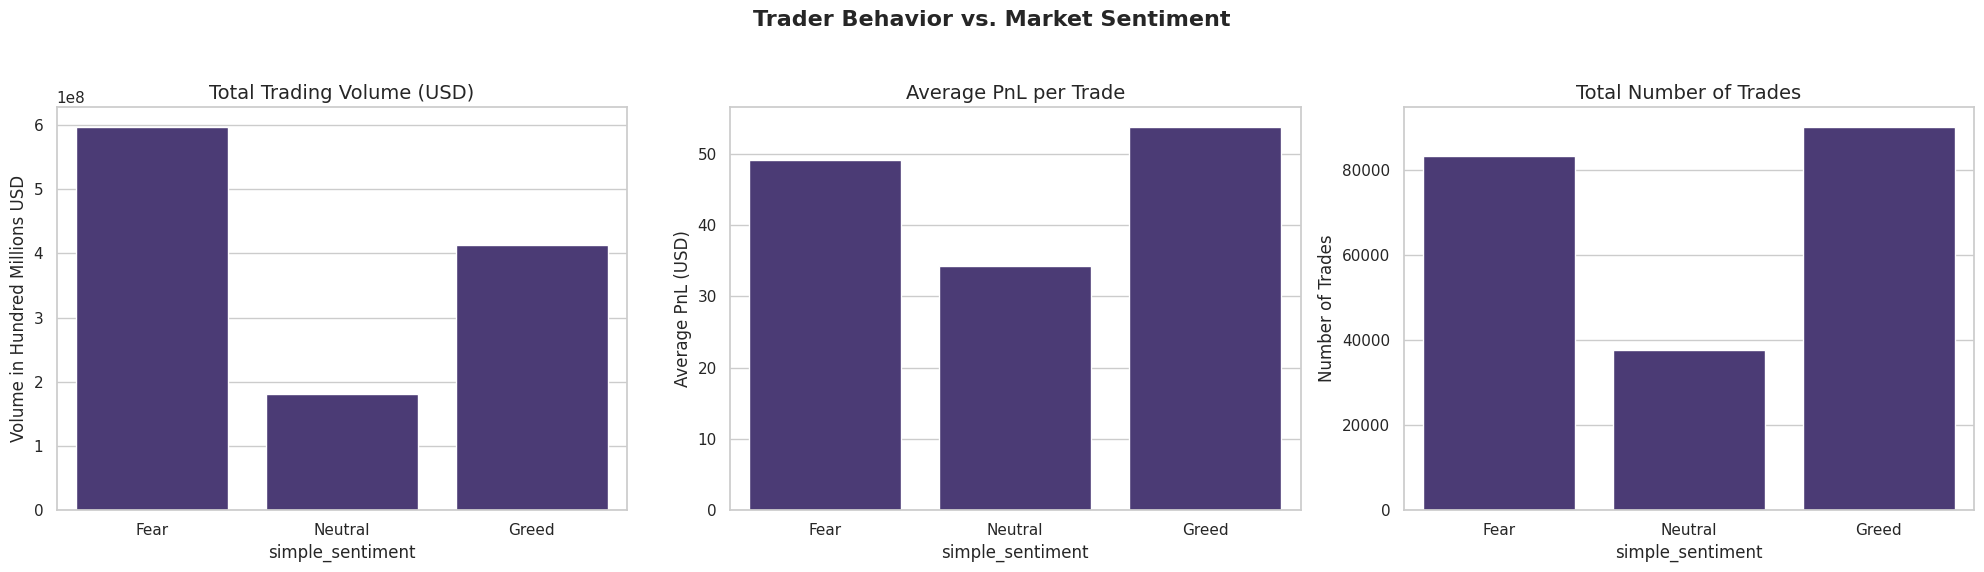

In [10]:
print("\n--- Starting High-Level Analysis ---")

sentiment_analysis = merged_df.groupby('simple_sentiment').agg(
    total_volume_usd=('size_usd', 'sum'),
    average_pnl=('closed_pnl', 'mean'),
    total_trades=('account', 'count')
).reindex(['Fear', 'Neutral', 'Greed'])

print("\n--- Overall Analysis by Sentiment: ---")
print(sentiment_analysis)

sns.set(style="whitegrid", palette="viridis")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Trader Behavior vs. Market Sentiment', fontsize=16, weight='bold')


sns.barplot(x=sentiment_analysis.index, y='total_volume_usd', data=sentiment_analysis, ax=axes[0])
axes[0].set_title('Total Trading Volume (USD)', fontsize=14)
axes[0].set_ylabel('Volume in Hundred Millions USD')


sns.barplot(x=sentiment_analysis.index, y='average_pnl', data=sentiment_analysis, ax=axes[1])
axes[1].set_title('Average PnL per Trade', fontsize=14)
axes[1].set_ylabel('Average PnL (USD)')


sns.barplot(x=sentiment_analysis.index, y='total_trades', data=sentiment_analysis, ax=axes[2])
axes[2].set_title('Total Number of Trades', fontsize=14)
axes[2].set_ylabel('Number of Trades')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

chart_path_1 = 'outputs/behavior_vs_sentiment_overview.png'
plt.savefig(chart_path_1)
print(f"\n--- Overview chart saved to '{chart_path_1}' ---")
plt.show()


---  Analyzing BUY vs. SELL Behavior ---

--- BUY/SELL Volume by Sentiment: ---
  simple_sentiment  side  total_volume_usd
0             Fear   BUY      3.032828e+08
1             Fear  SELL      2.945263e+08
2            Greed   BUY      2.153212e+08
3            Greed  SELL      1.977265e+08
4          Neutral   BUY      7.362647e+07
5          Neutral  SELL      1.066156e+08

--- BUY/SELL chart saved to 'outputs/buy_sell_volume_by_sentiment.png' ---


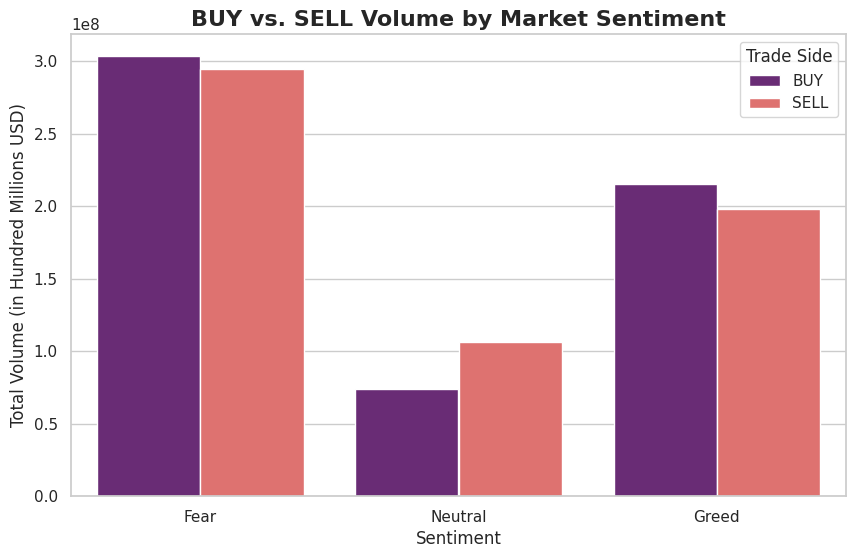

In [6]:
print("\n---  Analyzing BUY vs. SELL Behavior ---")
buy_sell_analysis = merged_df.groupby(['simple_sentiment', 'side']).agg(
    total_volume_usd=('size_usd', 'sum')
).reset_index()

print("\n--- BUY/SELL Volume by Sentiment: ---")
print(buy_sell_analysis)


plt.figure(figsize=(10, 6))
sns.barplot(x='simple_sentiment', y='total_volume_usd', hue='side', data=buy_sell_analysis, order=['Fear', 'Neutral', 'Greed'], palette='magma')
plt.title('BUY vs. SELL Volume by Market Sentiment', fontsize=16, weight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Total Volume (in Hundred Millions USD)')
plt.legend(title='Trade Side')

chart_path_2 = 'outputs/buy_sell_volume_by_sentiment.png'
plt.savefig(chart_path_2)
print(f"\n--- BUY/SELL chart saved to '{chart_path_2}' ---")
plt.show()


---  Analyzing Average Trade Size ---

--- Average Trade Size by Sentiment: ---
                  average_trade_size_usd
simple_sentiment                        
Fear                         7182.011019
Neutral                      4782.732661
Greed                        4574.424490

--- Trade size chart saved to 'outputs/average_trade_size_by_sentiment.png' ---


/tmp/ipython-input-7-3754010153.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trade_size_analysis.index, y='average_trade_size_usd', data=trade_size_analysis, palette='coolwarm')


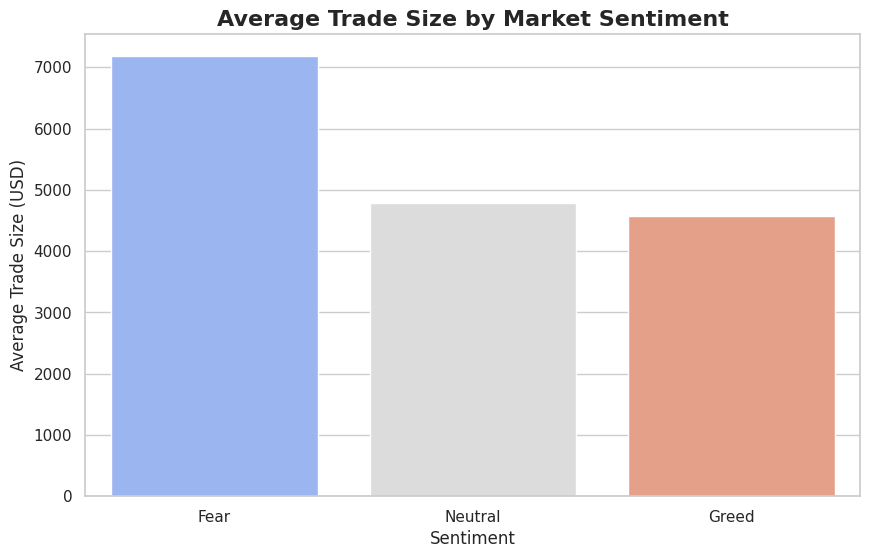

In [7]:
print("\n---  Analyzing Average Trade Size ---")
trade_size_analysis = merged_df.groupby('simple_sentiment').agg(
    average_trade_size_usd=('size_usd', 'mean')
).reindex(['Fear', 'Neutral', 'Greed'])

print("\n--- Average Trade Size by Sentiment: ---")
print(trade_size_analysis)

plt.figure(figsize=(10, 6))
sns.barplot(x=trade_size_analysis.index, y='average_trade_size_usd', data=trade_size_analysis, palette='coolwarm')
plt.title('Average Trade Size by Market Sentiment', fontsize=16, weight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Average Trade Size (USD)')

chart_path_3 = 'outputs/average_trade_size_by_sentiment.png'
plt.savefig(chart_path_3)
print(f"\n--- Trade size chart saved to '{chart_path_3}' ---")
plt.show()



---  Analyzing Top 10 Most Profitable Traders ---

--- Top 10 Traders' Behavior by Sentiment: ---
                  average_pnl  average_trade_size
simple_sentiment                                 
Fear                65.471845         7424.117335
Neutral             53.831636         5487.740626
Greed              110.054824         6970.664044


/tmp/ipython-input-9-3322637713.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_trader_analysis.index, y='average_pnl', data=top_trader_analysis, ax=axes[0], palette='YlGnBu')
/tmp/ipython-input-9-3322637713.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_trader_analysis.index, y='average_trade_size', data=top_trader_analysis, ax=axes[1], palette='YlOrRd')



--- Top traders analysis chart saved to 'outputs/top_traders_behavior.png' ---


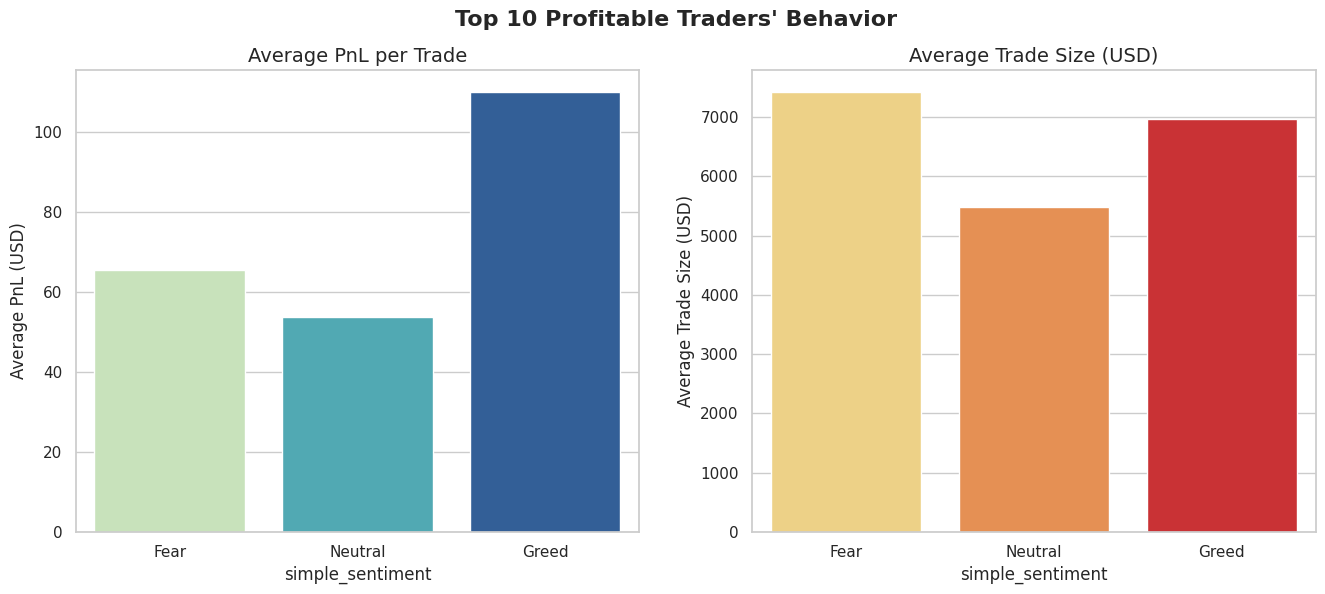

In [9]:
print("\n---  Analyzing Top 10 Most Profitable Traders ---")
top_traders = merged_df.groupby('account')['closed_pnl'].sum().nlargest(10).index
top_traders_df = merged_df[merged_df['account'].isin(top_traders)]

top_trader_analysis = top_traders_df.groupby('simple_sentiment').agg(
    average_pnl=('closed_pnl', 'mean'),
    average_trade_size=('size_usd', 'mean')
).reindex(['Fear', 'Neutral', 'Greed'])

print("\n--- Top 10 Traders' Behavior by Sentiment: ---")
print(top_trader_analysis)


# Visualization for Top Trader Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Top 10 Profitable Traders\' Behavior', fontsize=16, weight='bold')


sns.barplot(x=top_trader_analysis.index, y='average_pnl', data=top_trader_analysis, ax=axes[0], palette='YlGnBu')
axes[0].set_title('Average PnL per Trade', fontsize=14)
axes[0].set_ylabel('Average PnL (USD)')


sns.barplot(x=top_trader_analysis.index, y='average_trade_size', data=top_trader_analysis, ax=axes[1], palette='YlOrRd')
axes[1].set_title('Average Trade Size (USD)', fontsize=14)
axes[1].set_ylabel('Average Trade Size (USD)')

chart_path_4 = 'outputs/top_traders_behavior.png'
plt.savefig(chart_path_4)
print(f"\n--- Top traders analysis chart saved to '{chart_path_4}' ---")
plt.show()

In [11]:
!zip -r project_files.zip outputs/ csv_files/


  adding: outputs/ (stored 0%)
  adding: outputs/top_traders_behavior.png (deflated 21%)
  adding: outputs/buy_sell_volume_by_sentiment.png (deflated 18%)
  adding: outputs/behavior_vs_sentiment_overview.png (deflated 21%)
  adding: outputs/average_trade_size_by_sentiment.png (deflated 22%)
  adding: csv_files/ (stored 0%)
  adding: csv_files/processed_trader_sentiment_data.csv (deflated 83%)
